In [1]:
library(tidyverse)

source('../utils/plottingUtilities.R')

Loading tidyverse: ggplot2
Loading tidyverse: tibble
Loading tidyverse: tidyr
Loading tidyverse: readr
Loading tidyverse: purrr
Loading tidyverse: dplyr
Conflicts with tidy packages ---------------------------------------------------
filter(): dplyr, stats
lag():    dplyr, stats
Loading required package: scales

Attaching package: ‘scales’

The following object is masked from ‘package:purrr’:

    discard

The following object is masked from ‘package:readr’:

    col_factor

Loading required package: gridExtra

Attaching package: ‘gridExtra’

The following object is masked from ‘package:dplyr’:

    combine

Loading required package: grid


In [2]:
# original images 
x <- read.csv('../data/clean_x.csv')[, -1]

In [3]:
load('../scripts/irf_fits/irfSpatialFit_optix.Rdata')

In [4]:
load('../data/lateData.Rdata')

In [5]:
actual_names <- colnames(x.late)

In [6]:
colnames(x.late) <- as.character(1:dim(x.late)[2])

In [7]:
ls()

[1] "actual_names"    "fit"             "generateImage"   "getNodeImages"  
 [5] "getNodeLabel"    "getNodePosition" "img2Color"       "late"           
 [9] "mapLate2Early"   "multiplot"       "overlayImage"    "overlayImages"  
[13] "plot_all_PPs"    "plotGroupImg"    "plotImg"         "plotPP"         
[17] "shiftHoriz"      "shiftImg"        "shiftVert"       "test.id"        
[21] "tf"              "train.id"        "x"               "x.late"         
[25] "y.late"

In [8]:
fit$importance

int,sta.diff,diff,sta.prev,prev1,prev0,sta.prec,prec
92+_93+,0.99,0.080332771,0.97,0.080355464,2.269300e-05,0.76,0.9145514
480+_92+,0.96,0.070366032,0.92,0.070488834,1.228023e-04,NA,NaN
365+_605+,0.99,0.064732461,0.99,0.064774226,4.176543e-05,0.91,0.9582918
205-_605+,1.00,0.058129102,0.96,0.058180582,5.148032e-05,0.96,0.9578701
532+_605+,0.99,0.054399044,0.95,0.054437244,3.819956e-05,0.79,0.9553465
548+_92+,0.92,0.043365201,0.85,0.043404047,3.884544e-05,NA,NaN
585+_92+,0.98,0.038277322,0.83,0.038305193,2.787083e-05,NA,NaN
605+_92+,0.94,0.036156276,0.01,0.036186358,3.008137e-05,0.87,0.8958215
605+_609-,0.99,0.035231279,0.79,0.035257370,2.609070e-05,NA,NaN
570+_605-,1.00,0.033062111,0.99,0.036126144,3.064033e-03,0.68,0.7810813


In [9]:
which_int <- (fit$importance[, 'sta.prev'] > 0.5) & 
            (fit$importance[, 'sta.prec'] > 0.5) & 
            (fit$importance[, 'sta.diff'] > 0.5)


In [10]:
interactions <- fit$importance[as.vector(which_int), 'int']

In [11]:
interactions

int
92+_93+
365+_605+
205-_605+
532+_605+
570+_605-
484-_605+
28+_570+
604+_92-


In [12]:
interaction1 <- gsub('_.*', "", unlist(interactions))
interaction1 <- substr(interaction1,1,nchar(interaction1)-1) 
print(interaction1)

 int1  int2  int3  int4  int5  int6  int7  int8 
 "92" "365" "205" "532" "570" "484"  "28" "604" 


In [13]:
interaction2 <- gsub('.*_', "", unlist(interactions))
interaction2 <- substr(interaction2,1,nchar(interaction2)-1) 
print(interaction2)

 int1  int2  int3  int4  int5  int6  int7  int8 
 "93" "605" "605" "605" "605" "605" "570"  "92" 


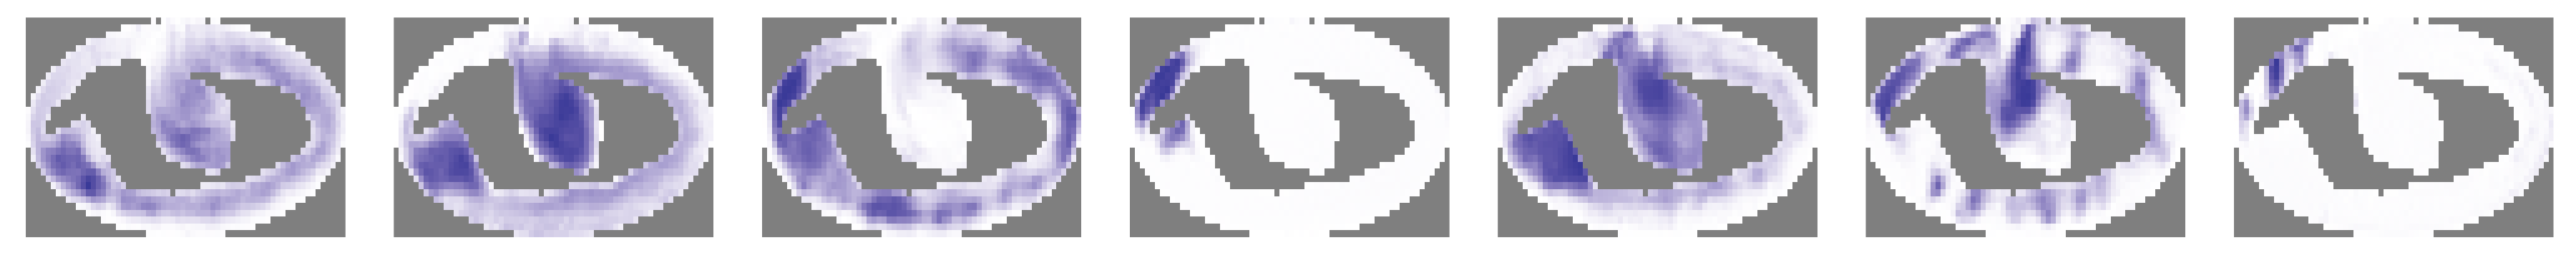

In [37]:
p <- list()
n_genes <- 7
for(i in 1:n_genes){
    gene <- interaction1[i + 1]
    p[[i]] <- plotImg(x.late[, gene], late$template, FALSE)    
}

options(repr.plot.width = 30, repr.plot.height = 3)
multiplot(plotlist = p, cols = n_genes)


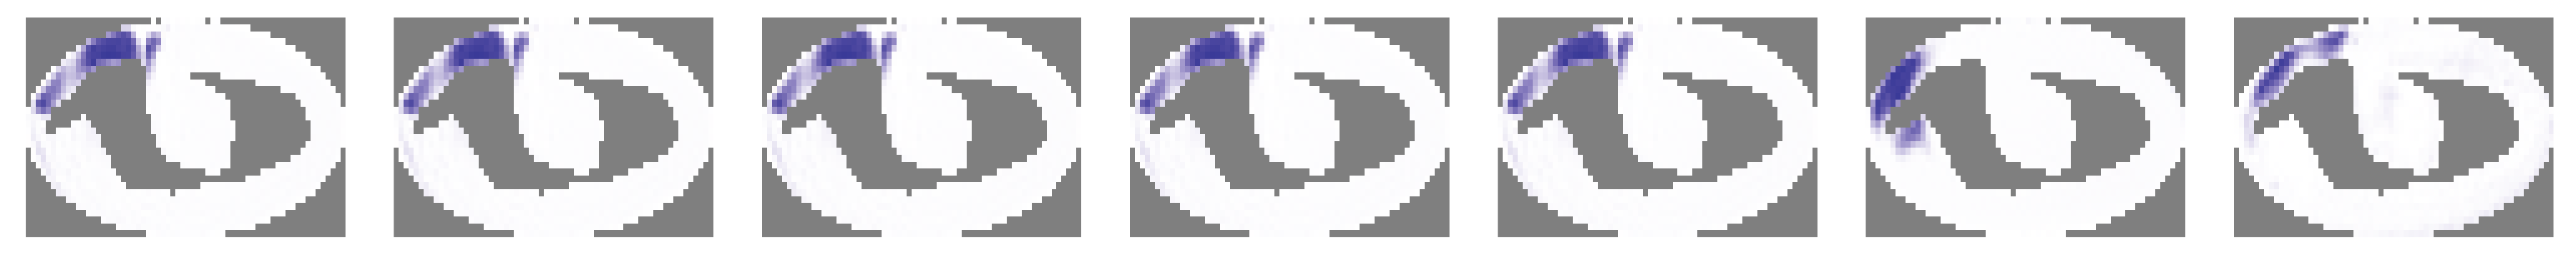

In [39]:
p <- list()
n_genes <- 7
for(i in 1:n_genes){
    gene <- interaction2[i + 1]
    p[[i]] <- plotImg(x.late[, gene], late$template, FALSE)    
}

options(repr.plot.width = 30, repr.plot.height = 3)
multiplot(plotlist = p, cols = n_genes)


In [40]:
actual_names[as.numeric(interaction1)]

[1] "Tkr"      "CG5114"   "Larp"     "Alhambra" "Optix"    "LanA"     "h"       
[8] "Eya_1"

In [41]:
actual_names[as.numeric(interaction2)]

[1] "Tkr.1"   "Eya_1.1" "Eya_1.1" "Eya_1.1" "Eya_1.1" "Eya_1.1" "Optix"  
[8] "Tkr"

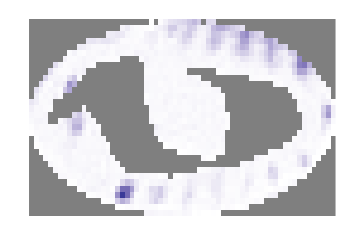

In [44]:
options(repr.plot.width = 3, repr.plot.height = 2)
plotImg(late$x[, 'ey'], late$template, FALSE)    